
Vértices requeridos: {2, 3, 4, 7, 10, 11, 12}
Arestas requeridas: {(9, 10), (2, 4), (10, 11), (5, 11), (2, 3), (2, 9), (7, 12), (5, 6), (8, 11), (5, 12), (7, 8)}
Arcos requeridos: {(1, 12), (1, 2), (3, 4), (8, 10), (1, 4), (1, 7), (7, 6), (12, 6), (1, 10), (5, 3), (9, 11)}

Métricas do Grafo:

+-----------------------------------+---------------------------------------------+
| Métrica                           | Valor                                       |
+===================================+=============================================+
| Quantidade de vértices            | 12                                          |
+-----------------------------------+---------------------------------------------+
| Quantidade de arestas             | 11                                          |
+-----------------------------------+---------------------------------------------+
| Quantidade de arcos               | 22                                          |
+-------------------------------

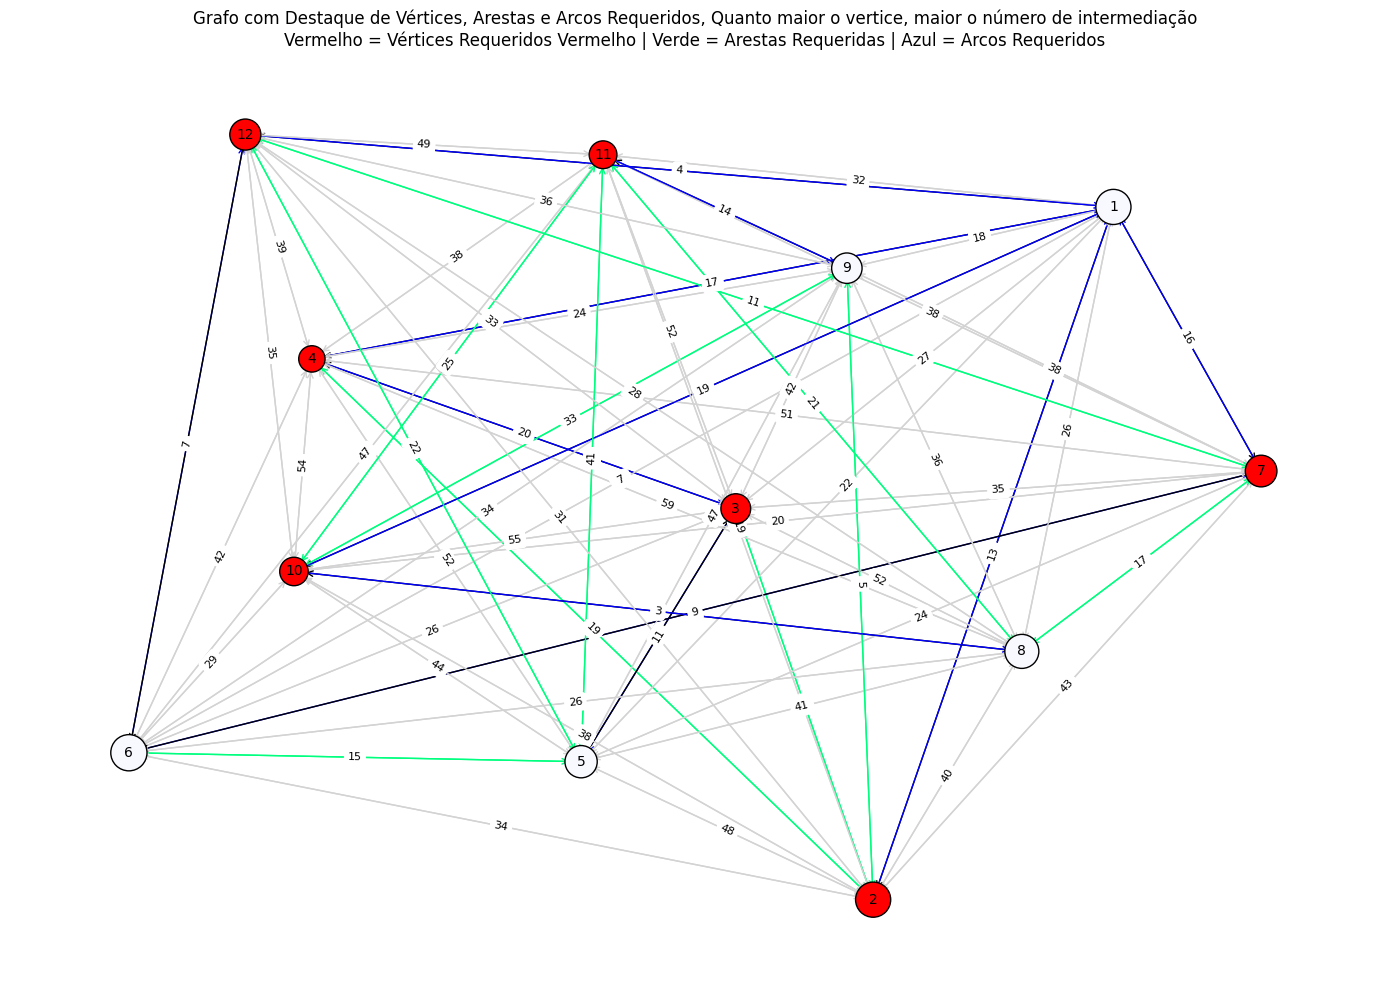

In [3]:
from ETAPA1TRABALHO import Grafo, quantidadeDeVertices, quantidadeDeVerticesRequeridos, arcosRequeridos, arestasRequeridas, verticesRequeridos
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Caminho do arquivo
arquivo = "BHW1.dat"

# Criação do grafo
g = Grafo(quantidadeDeVertices(arquivo))
g.adiciona_arco_Normal(arquivo)
g.adiciona_arco_Requerido(arquivo)
g.adiciona_aresta_Normal(arquivo)
g.adiciona_aresta_requerida(arquivo)

# Executa Floyd-Warshall
dist, pred = g.floyd_warshall()

# === Lê os dados requeridos diretamente das funções ===
vertices_requeridos = verticesRequeridos(arquivo)
arestas_reqs = arestasRequeridas(arquivo)
arcos_reqs = arcosRequeridos(arquivo)



# Intermediação
intermediacao = g.intermediacao(pred)

# Criação do grafo para visualização
G = nx.DiGraph()
num_nos = len(dist)

# Adiciona as arestas ao grafo
for i in range(1,num_nos+1):
    for j in range(1,num_nos+1):
        if i != j:
            weight = dist[i-1][j-1]
            G.add_edge(i, j, weight=weight)

# === Coloração dos vértices ===
cor_dos_nos = ['#FF0000' if i in vertices_requeridos else '#F8F8FF' for i in G.nodes()]
tamanho_dos_nos = [300 + inter * 20 for inter in intermediacao]

# Cores para as arestas/arcos
cor_das_arestas = []
for u, v in G.edges():
    # Verifica se (u, v) é um arco requerido
    if (u, v) in arcos_reqs:
        cor_das_arestas.append('#000000')  # Arco requerido: Preto
    # Verifica se (v, u) é um arco requerido (para arcos bidirecionados)
    elif (v, u) in arcos_reqs:
        cor_das_arestas.append('#0000FF')  # Arco requerido: Azul
    # Verifica se (u, v) ou (v, u) é uma aresta requerida
    elif (u, v) in arestas_reqs or (v, u) in arestas_reqs:
        cor_das_arestas.append('#00FF7F')  # Aresta requerida: Verde
    else:
        cor_das_arestas.append('#D3D3D3')  # Aresta normal: Cinza

rotulos_das_arestas = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

# Layout do grafo
pos = nx.spring_layout(G, seed=42)

# Coleta de métricas
dados = {
    "Métrica": [
        "Quantidade de vértices",
        "Quantidade de arestas",
        "Quantidade de arcos",
        "Quantidade de vértices requeridos",
        "Quantidade de arestas requeridas",
        "Quantidade de arcos requeridas",
        "Densidade",
        "Componentes conectados",
        "Grau mínimo",
        "Grau máximo",
        "Caminho médio",
        "Intermediação",
        "Diâmetro"
    ],
    "Valor": [
        quantidadeDeVertices(arquivo),
        g.quantidadeDeArestas(arquivo),
        g.quantidadeDeArcos(arquivo),
        quantidadeDeVerticesRequeridos(arquivo),
        g.quantidadeDeArestasRequeridas(arquivo),
        g.quantidadeDeArcosRequeridos(arquivo),
        f"{g.densidadeGrafo(arquivo):.2f}",
        g.encontrarComponentes(),
        g.grauMinimo(),
        g.grauMaximo(),
        f"{g.caminho_medio(dist):.2f}",
        g.intermediacao(pred),
        g.diametroDoGrafo()
    ]
}

# DEBUG prints (opcional)
print(f"\nVértices requeridos: {vertices_requeridos}")
print(f"Arestas requeridas: {arestas_reqs}")
print(f"Arcos requeridos: {arcos_reqs}")

# Mostra as métricas
df_metricas = pd.DataFrame(dados)
print("\nMétricas do Grafo:\n")
print(df_metricas.to_markdown(index=False, tablefmt="grid"))

# Desenha o grafo
plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(G, pos, node_color=cor_dos_nos, node_size=tamanho_dos_nos, edgecolors='black')
nx.draw_networkx_edges(G, pos, edge_color=cor_das_arestas, arrowstyle='->', arrowsize=10)
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=rotulos_das_arestas, font_size=8)

plt.title("Grafo com Destaque de Vértices, Arestas e Arcos Requeridos, Quanto maior o vertice, maior o número de intermediação\nVermelho = Vértices Requeridos Vermelho | Verde = Arestas Requeridas | Azul = Arcos Requeridos")
plt.axis('off')
plt.tight_layout()
plt.savefig("grafo.png")
plt.show()
plt.close()